In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_behaviour = pd.read_csv(r"C:/Users/Tridev/Downloads/EV/buying_behaviour.csv")
df_2wheeler = pd.read_csv(r"C:\Users\Tridev\Downloads\EV\Ev2Wheeler.csv")
charging_station = pd.read_csv(r"C:\Users\Tridev\Downloads\EV\charging_station.csv")
sale = pd.read_excel(r"C:\Users\Tridev\Downloads\EV\Two_wheeler_sale.xlsx")

In [3]:
df_behaviour.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [4]:
df_2wheeler.head()

,Model,Price,Range,Charging_time,Top_speed,Motor_type,Battery_type,Battery_capacity,Wheels_type,Tyre_type
0,Ola S1,1.00,128.0,NaN,95.0,Mid Drive IPM,NaN,3 kWh,Aluminium Alloy,Tubeless
1,TVS iQube Electric,1.60,100.0,2 Hour 50 Min - 80%,78.0,BLDC,Lithium Ion,3.04 kwh,Alloy,Tubeless
2,Ather 450X,0.98,146.0,5 hours 40 minutes,90.0,PMSM,Lithium-ion,3.7 kWh,Alloy,Tubeless
3,Bajaj Chetak,1.22,90.0,4 Hours,63.0,BLDC,Lithium Ion,3.04,Alloy,Tubeless
4,Ola S1 Pro,1.24,181.0,NaN,116.0,Mid Drive IPM,NaN,4 kWh,Aluminium Alloy,Tubeless


In [5]:
df_behaviour.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


### Buying Behaviour dataset does not contain null values

In [6]:
df_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [7]:
df_2wheeler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             74 non-null     object 
 1   Price             74 non-null     float64
 2   Range             70 non-null     float64
 3   Charging_time     13 non-null     object 
 4   Top_speed         59 non-null     float64
 5   Motor_type        74 non-null     object 
 6   Battery_type      66 non-null     object 
 7   Battery_capacity  70 non-null     object 
 8   Wheels_type       70 non-null     object 
 9   Tyre_type         63 non-null     object 
dtypes: float64(3), object(7)
memory usage: 5.9+ KB


### Charging time column has Null Value in 61 rows out of 74. Removing the charging time column

In [8]:
df_2wheeler.isnull().sum()

Model                0
Price                0
Range                4
Charging_time       61
Top_speed           15
Motor_type           0
Battery_type         8
Battery_capacity     4
Wheels_type          4
Tyre_type           11
dtype: int64

In [9]:
df_2wheeler.drop(labels="Charging_time", axis=1, inplace=True)

### "Lithium-ion" has 7 different types of spelling & "Alloy" has 3 different spelling

In [10]:
df_2wheeler['Battery_type'].value_counts(), df_2wheeler['Wheels_type'].value_counts()

(Lithium Ion                 36
 Lithium-Ion                  8
 VRLA                         6
 Lithium-ion                  4
 Lithium Ion (Fixed Type)     3
 Lead Acid                    2
 BMS Battery                  2
 LFP                          1
 Li-ion                       1
 Lithium Ferro Phosphate      1
 Lithium ion                  1
 Lithium-Ion (Fixed Type)     1
 Name: Battery_type, dtype: int64,
 Alloy              61
 Aluminium Alloy     2
 ALLOY               2
 Spoke               2
 Alloy Wheels        1
 Steel               1
 Iron Rims           1
 Name: Wheels_type, dtype: int64)

In [11]:
df_2wheeler['Battery_type'].replace(to_replace=['Lithium Ion', 'Lithium-Ion', 'Li-ion', 'Lithium ion', 'Lithium-Ion (Fixed Type)', 
                                'Lithium Ion (Fixed Type)'], value= 'Lithium-ion', inplace=True)
df_2wheeler['Wheels_type'].replace(to_replace=['Aluminium Alloy', 'ALLOY', 'Alloy Wheels'], value= 'Alloy', inplace=True)

In [12]:
df_2wheeler['Battery_type'].value_counts(), df_2wheeler['Wheels_type'].value_counts()

(Lithium-ion                54
 VRLA                        6
 Lead Acid                   2
 BMS Battery                 2
 LFP                         1
 Lithium Ferro Phosphate     1
 Name: Battery_type, dtype: int64,
 Alloy        66
 Spoke         2
 Steel         1
 Iron Rims     1
 Name: Wheels_type, dtype: int64)

### 'Wheels_type' column has 4 Null values. Price above 1 Lakh has 'Alloy' wheels and Below 50,000 has 'Iron Rims'

In [13]:
df_2wheeler[df_2wheeler['Wheels_type'].isnull()]

,Model,Price,Range,Top_speed,Motor_type,Battery_type,Battery_capacity,Wheels_type,Tyre_type
24,Komaki XGT KM,0.43,150.0,NaN,BLDC,Lithium-ion,NaN,NaN,Tubeless
49,Ultraviolette F77,3.80,307.0,152.0,Permanent Magnet AC Motor,Lithium-ion,10.3 kWh,NaN,NaN
57,Odysse Electric VADER,1.09,NaN,85.0,Hub Motor,Lithium-ion,3.7 Kwh,NaN,NaN
62,Earth Energy EV Evolve R,1.42,100.0,110.0,PMAC,Lithium-ion,115,NaN,NaN


In [14]:
df_2wheeler['Wheels_type'][24] = 'Iron Rims'
df_2wheeler['Wheels_type'][[49,57,62]] = 'Alloy'

### There are 8 Null values and majority of battery type is lithium-ion, so filling Null values with 'Lithium-ion'

In [15]:
df_2wheeler['Battery_type'].value_counts(), print(f"No. null values: {df_2wheeler['Battery_type'].isnull().sum()}")

No. null values: 8


(Lithium-ion                54
 VRLA                        6
 Lead Acid                   2
 BMS Battery                 2
 LFP                         1
 Lithium Ferro Phosphate     1
 Name: Battery_type, dtype: int64,
 None)

In [16]:
df_2wheeler['Battery_type'].fillna('Lithium-ion', inplace=True)
df_2wheeler['Battery_type'].replace(to_replace='Lithium Ferro Phosphate', value='LFP', inplace=True)

In [17]:
df_2wheeler['Battery_type'].value_counts()

Lithium-ion    62
VRLA            6
LFP             2
Lead Acid       2
BMS Battery     2
Name: Battery_type, dtype: int64

### There are 11 Null values in column 'Tyre_type'. Filling Null values with 'Tubeless' where Wheels_type has 'Alloy' and 'Tube' where Wheels_type has 'Spoke'

In [18]:
df_2wheeler[df_2wheeler['Tyre_type'].isnull()]

,Model,Price,Range,Top_speed,Motor_type,Battery_type,Battery_capacity,Wheels_type,Tyre_type
7,Hero Electric Optima,0.67,140.0,45.0,BLDC,Lithium-ion,1.54,Alloy,NaN
8,Ampere Magnus EX,0.84,121.0,50.0,BLDC,Lithium-ion,2.3,Alloy,NaN
14,River Indie,1.25,120.0,90.0,Mid-Drive PMSM,Lithium-ion,4 kWh,Alloy,NaN
49,Ultraviolette F77,3.80,307.0,152.0,Permanent Magnet AC Motor,Lithium-ion,10.3 kWh,Alloy,NaN
53,Matter Aera,1.43,125.0,NaN,BLDC,Lithium-ion,5 kWh,Alloy,NaN
54,One Electric Motorcycles Kridn,1.35,110.0,95.0,PMAC,Lithium-ion,3 kWh,Alloy,NaN
57,Odysse Electric VADER,1.09,NaN,85.0,Hub Motor,Lithium-ion,3.7 Kwh,Alloy,NaN
61,Earth Energy EV Evolve Z,1.30,100.0,95.0,PMAC,Lithium-ion,96,Alloy,NaN
62,Earth Energy EV Evolve R,1.42,100.0,110.0,PMAC,Lithium-ion,115,Alloy,NaN
63,Atumobile Atum Version 1.0,0.75,100.0,25.0,DC Brushless,Lithium-ion,1.248 kWh,Spoke,NaN


In [19]:
df_2wheeler['Tyre_type'].value_counts()

Tubeless    54
Tube         9
Name: Tyre_type, dtype: int64

In [20]:
df_2wheeler['Tyre_type'][63] = 'Tube'
df_2wheeler['Tyre_type'].fillna('Tubeless', inplace=True)

In [21]:
df_2wheeler['Tyre_type'].value_counts()

Tubeless    64
Tube        10
Name: Tyre_type, dtype: int64

### Replaced similar motor type name into one category

In [22]:
df_2wheeler['Motor_type'].value_counts()

BLDC                         48
PMAC                          5
Brushless DC                  4
DC Brushless                  4
PMSM                          3
Mid Drive IPM                 2
Hub Motor                     2
Mid-Drive PMSM                1
Mid Drive                     1
Permanent Magnet AC Motor     1
IPMSM Motor                   1
DC Brushless Hub Motor        1
BLDC Hub motor                1
Name: Motor_type, dtype: int64

In [23]:
df_2wheeler['Motor_type'].replace(to_replace=['Brushless DC', 'DC Brushless Hub Motor'], value= 'DC Brushless', inplace=True)
df_2wheeler['Motor_type'].replace(to_replace=['Hub Motor', 'BLDC'], value= 'BLDC Hub motor', inplace=True)
df_2wheeler['Motor_type'].replace(to_replace=['Mid Drive IPM', 'PMSM', 'Mid-Drive PMSM'], value= 'Mid Drive', inplace=True)
df_2wheeler['Motor_type'].replace(to_replace=['Permanent Magnet AC Motor', '3000'], value= 'PMAC', inplace=True)

In [24]:
df_2wheeler['Motor_type'].value_counts()

BLDC Hub motor    51
DC Brushless       9
Mid Drive          7
PMAC               6
IPMSM Motor        1
Name: Motor_type, dtype: int64

In [25]:
df_2wheeler['Battery_capacity'] = df_2wheeler['Battery_capacity'].str.replace(' kwh', '')
df_2wheeler['Battery_capacity'] = df_2wheeler['Battery_capacity'].str.replace(' kWh', '')
df_2wheeler['Battery_capacity'] = df_2wheeler['Battery_capacity'].str.replace(' kWH', '')
df_2wheeler['Battery_capacity'] = df_2wheeler['Battery_capacity'].str.replace(' Kwh', '')
df_2wheeler['Battery_capacity'] = df_2wheeler['Battery_capacity'].str.replace(' KWh', '')
df_2wheeler['Battery_capacity'] = df_2wheeler['Battery_capacity'].str.replace(' KWH', '')

In [26]:
df_2wheeler['Battery_capacity'] = df_2wheeler['Battery_capacity'].astype('float')
df_2wheeler['Battery_capacity'] = round(df_2wheeler['Battery_capacity'].fillna(df_2wheeler['Battery_capacity'].mean()),2)

### Filling null values in Top speed and Range Column

In [27]:
df_2wheeler['Top_speed'] = round(df_2wheeler['Top_speed'].fillna(df_2wheeler['Top_speed'].mean()),2)
df_2wheeler['Range'] = round(df_2wheeler['Range'].fillna(df_2wheeler['Range'].mean()),2)

### Exploring the Data

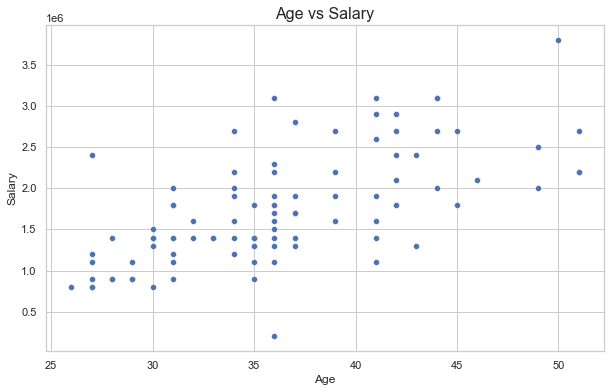

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Salary", data=df_behaviour)
plt.title("Age vs Salary", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.show()

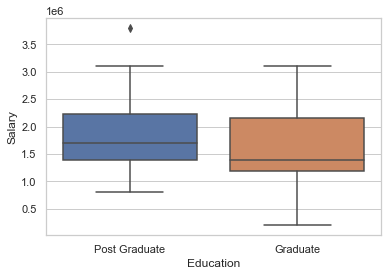

In [29]:
sns.boxplot(x="Education", y="Salary", data=df_behaviour)
plt.show()

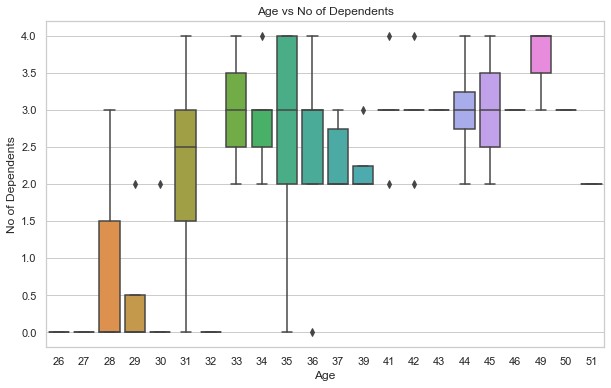

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_behaviour, x='Age', y='No of Dependents')
plt.title('Age vs No of Dependents')
plt.xlabel('Age')
plt.ylabel('No of Dependents')
plt.show()

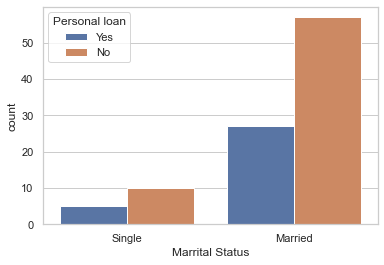

In [31]:
sns.countplot(x='Marrital Status', hue='Personal loan', data=df_behaviour)
plt.show()

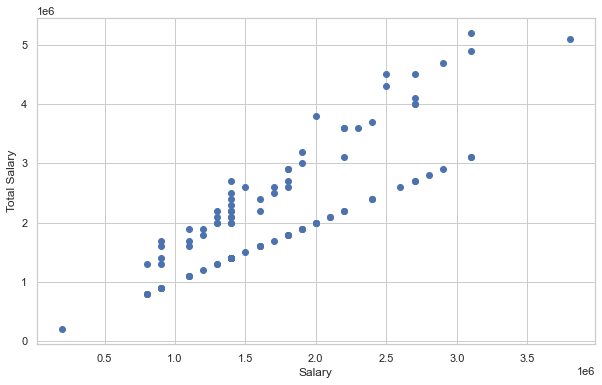

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df_behaviour['Salary'], df_behaviour['Total Salary'])
plt.xlabel('Salary')
plt.ylabel('Total Salary')
plt.show()

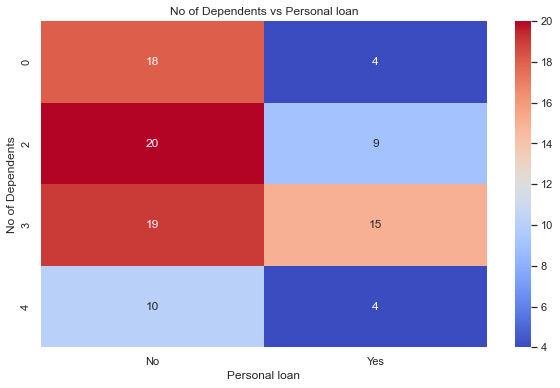

In [33]:
plt.figure(figsize=(10, 6))
pivot_table = df_behaviour.pivot_table(index='No of Dependents', columns='Personal loan', values='Age', aggfunc='count')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='g')
plt.title('No of Dependents vs Personal loan')
plt.show()

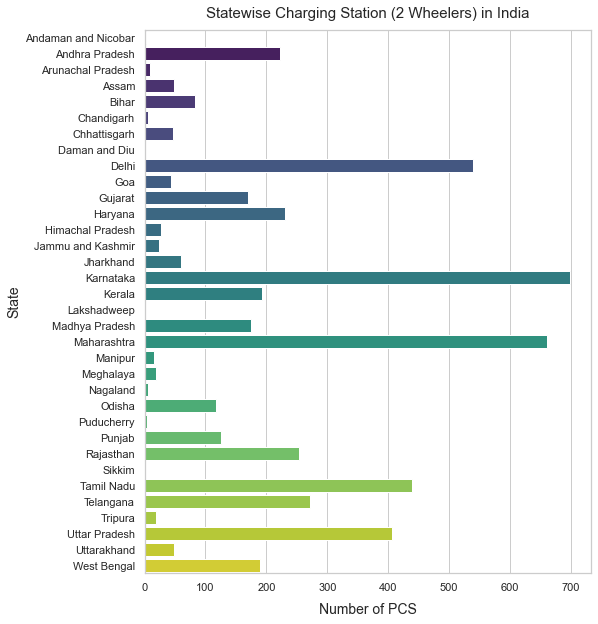

In [34]:
plt.figure(figsize=(8, 10))
sns.barplot(data=charging_station, y=charging_station['State Name'].sort_values(ascending=True), x='Number of PCS', palette='viridis')
plt.ylabel('State', fontsize=14)
plt.xlabel('Number of PCS', fontsize=14, labelpad=10)
plt.title(label='Statewise Charging Station (2 Wheelers) in India', weight=200, size=15, pad=12)
plt.show()

In [35]:
sale.head()

,Maker,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,March,Total Sale
0,OLA ELECTRIC,12708,9268,5898,3864,3476,9896,16353,16385,17362,18338,17720,21299,152567
1,OKINAWA,11012,9307,6984,8098,8679,8498,14945,9065,5282,4408,3846,4507,94631
2,HERO ELECTRIC,6804,2971,6837,9306,10820,8210,8869,9027,8101,6399,5865,6653,89862
3,AMPERE,6865,6179,6920,6813,6773,6478,10077,12260,4422,4371,5850,9343,86351
4,TVS,1498,480,1980,4347,6412,3994,5811,8132,9358,10460,12649,16779,81900


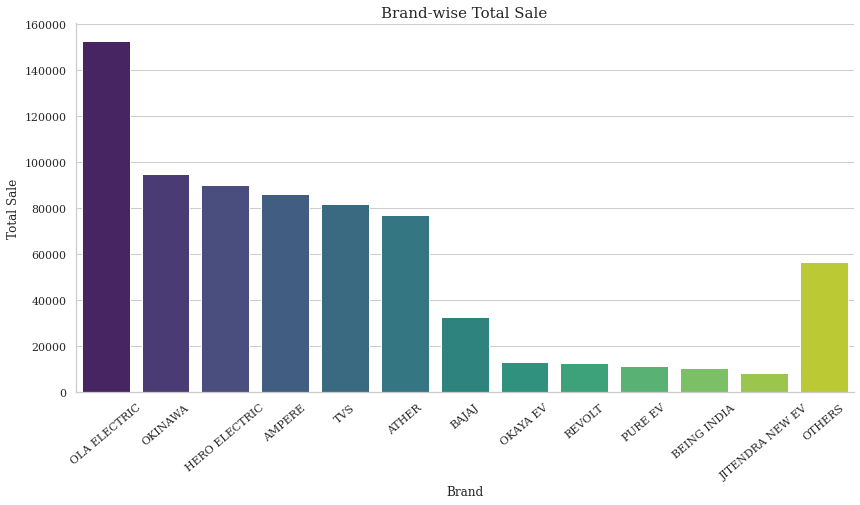

In [36]:
sns.catplot(kind='bar', data=sale, x='Maker', y='Total Sale', palette='viridis', ci=None, height=6, aspect=2)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Total Sale', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Total Sale', family='serif', size=15);

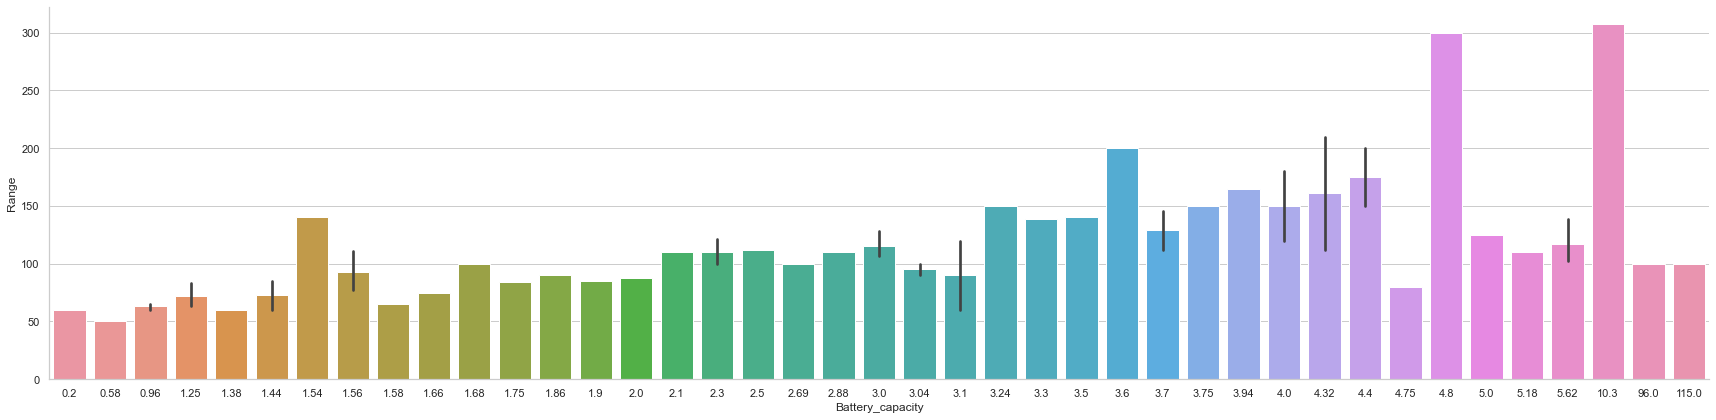

In [37]:
sns.catplot(data=df_2wheeler, y='Range', x='Battery_capacity', kind='bar', height=6, aspect=4)
plt.ylabel('Range')
plt.xlabel('Battery_capacity')
plt.show()

In [47]:
df_2wheeler.head()

,Model,Price,Range,Top_speed,Motor_type,Battery_type,Battery_capacity,Wheels_type,Tyre_type
0,Ola S1,1.00,128.0,95.0,Mid Drive,Lithium-ion,3.00,Alloy,Tubeless
1,TVS iQube Electric,1.60,100.0,78.0,BLDC Hub motor,Lithium-ion,3.04,Alloy,Tubeless
2,Ather 450X,0.98,146.0,90.0,Mid Drive,Lithium-ion,3.70,Alloy,Tubeless
3,Bajaj Chetak,1.22,90.0,63.0,BLDC Hub motor,Lithium-ion,3.04,Alloy,Tubeless
4,Ola S1 Pro,1.24,181.0,116.0,Mid Drive,Lithium-ion,4.00,Alloy,Tubeless


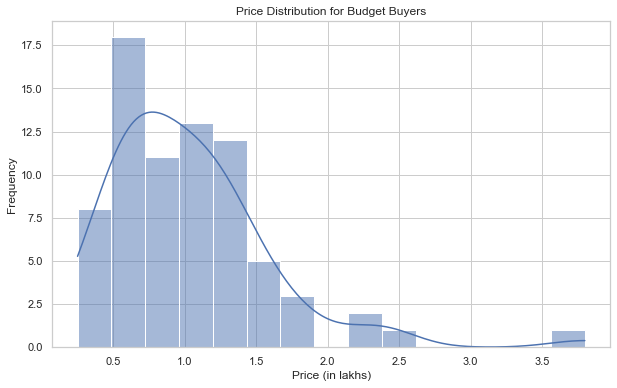

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_2wheeler, x='Price', bins=15, kde=True)
plt.title('Price Distribution for Budget Buyers')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

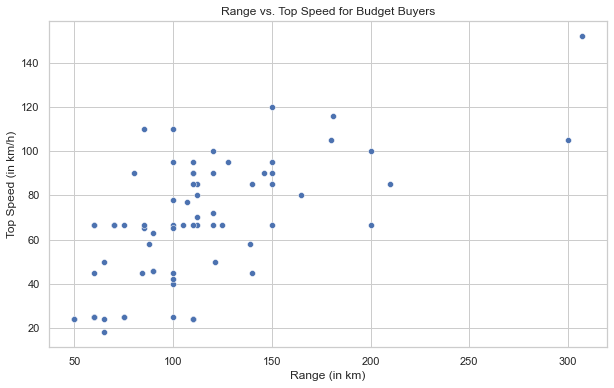

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2wheeler, x='Range', y='Top_speed')
plt.title('Range vs. Top Speed for Budget Buyers')
plt.xlabel('Range (in km)')
plt.ylabel('Top Speed (in km/h)')
plt.show()

### Preprocessing the Data

In [38]:
X = df_2wheeler.drop(labels='Model',axis=1)

In [39]:
le = LabelEncoder()
X['Motor_type'] = le.fit_transform(X['Motor_type'])
X['Battery_type'] = le.fit_transform(X['Battery_type'])
X['Wheels_type'] = le.fit_transform(X['Wheels_type'])
X['Tyre_type'] = le.fit_transform(X['Tyre_type'])

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [70]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca.head()

,PC1,PC2,PC3
0,26.528028,15.026070,-12.423551
1,-6.030683,12.273528,-9.712652
2,40.798356,4.638433,-6.266112
3,-21.382024,4.302748,-4.630247
4,83.450224,11.911363,-11.621011


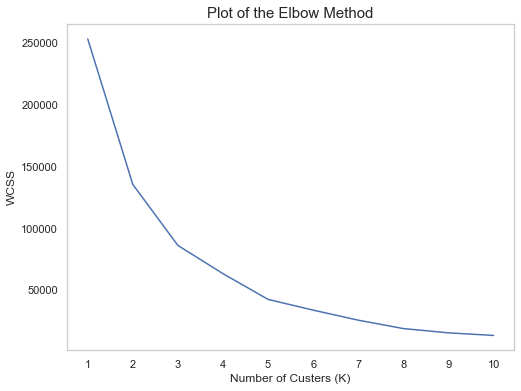

In [71]:
wcss = []
for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)
plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15)
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.yticks()
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### Using K-means Clustering 

In [80]:
kmean = KMeans(n_clusters=4)
kmean.fit(X_pca)

KMeans(n_clusters=4)

In [81]:
pd.Series(kmean.labels_).value_counts()

2    32
1    28
3    12
0     2
dtype: int64

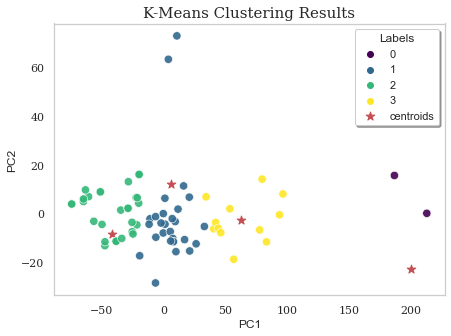

In [83]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC3', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', size=12)
plt.ylabel('PC2', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()